In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns 
import mpl_toolkits.mplot3d  # noqa: F401
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

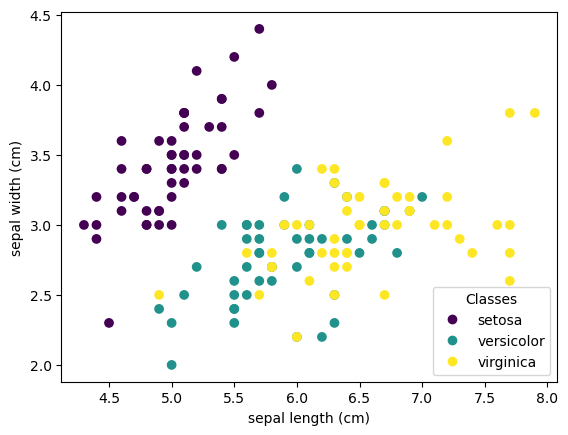

In [3]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# INSIGHT FROM THE SCATTER PLOT

The distinction between the setosa and the 2 other classes is quite linear but the versicolor and virginica are a very mixed.
This suggests that a linear regression model may not be enough. But will dig further into relationship between size and species

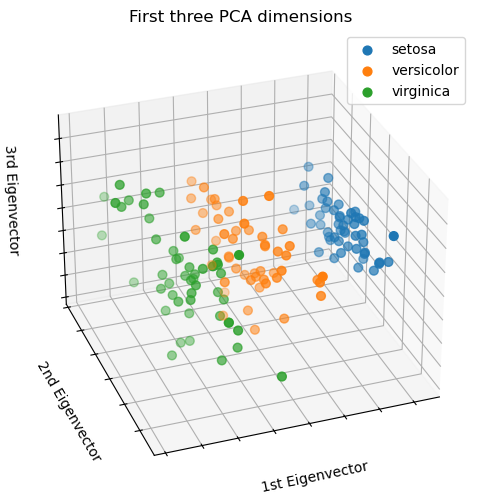

In [4]:
# unused but required import for doing 3d projections with matplotlib < 3.2


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    ax.scatter(
        X_reduced[iris.target == target, 0],
        X_reduced[iris.target == target, 1],
        X_reduced[iris.target == target, 2],
        label=label,
        s=40,
    )

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

ax.legend()

plt.show()

# INSIGHT

From the PCA in the plot above, from which i was inspired by <a href = "https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html"> the documentation to load the iris data set </a> , we can clearly see that the PCA to reduce the dimension from 4 to 3 helps already ditinguish the classes. The decision boundary that sets aside the class is still "setosa" is quite clear. We've also gained a lot of separation between virginica and versicolor even if the boundary is still blurry

In [5]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
df['target_names'] = df.target.apply(lambda x : iris.target_names[int(x)])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   target_names       150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


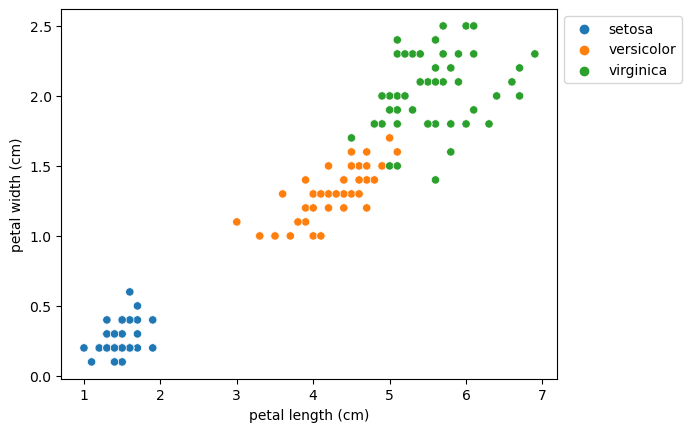

In [9]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
				hue='target_names', data=df, ) 

# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.show()


# Insight
There is a clear linear relationship between the combination of petal length and width with the species

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

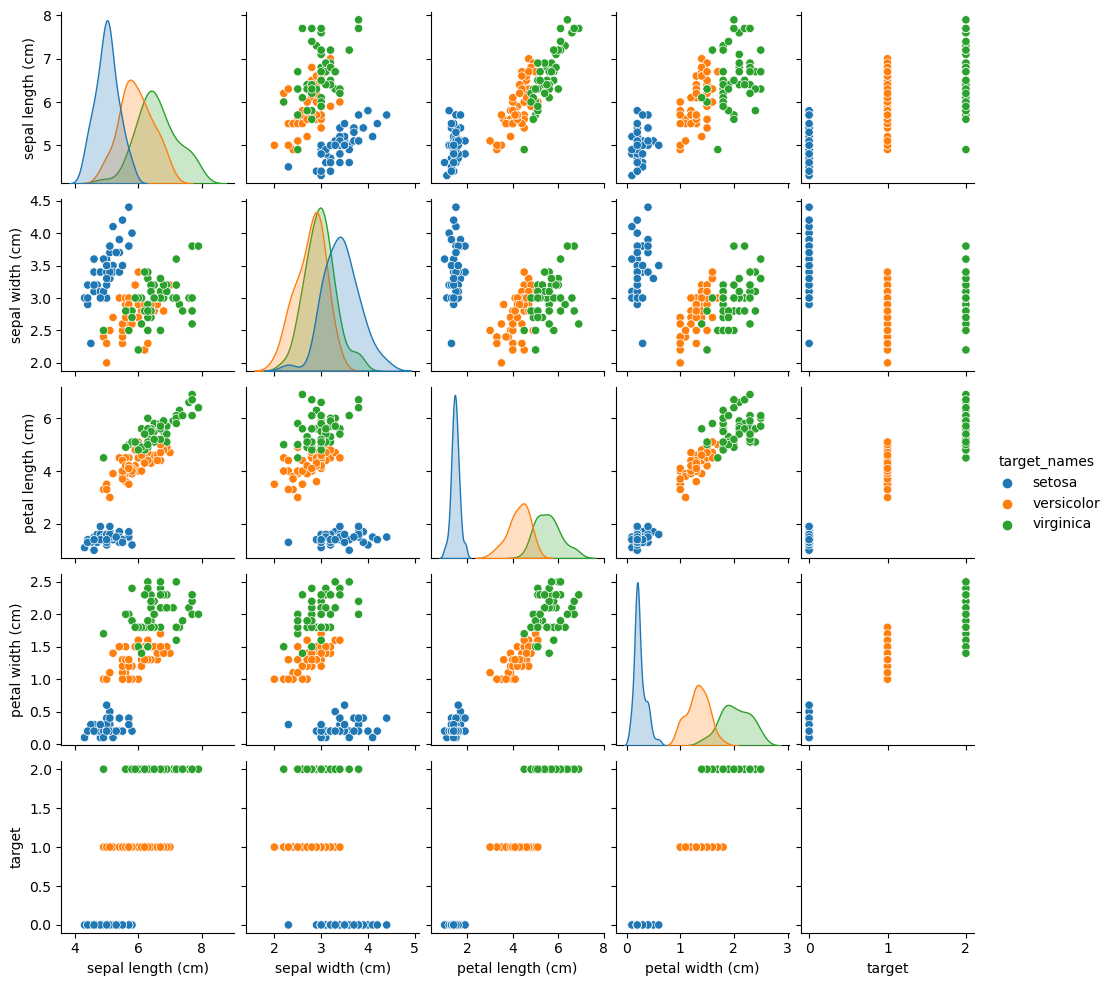

In [17]:
#Pairplot

sns.pairplot(df, hue='target_names', height=2)

# INSIGHT
We can see overlapping distributions when caparing sepal sizes but there are way less overlapping when comparing petal sizes, we could use them as features.

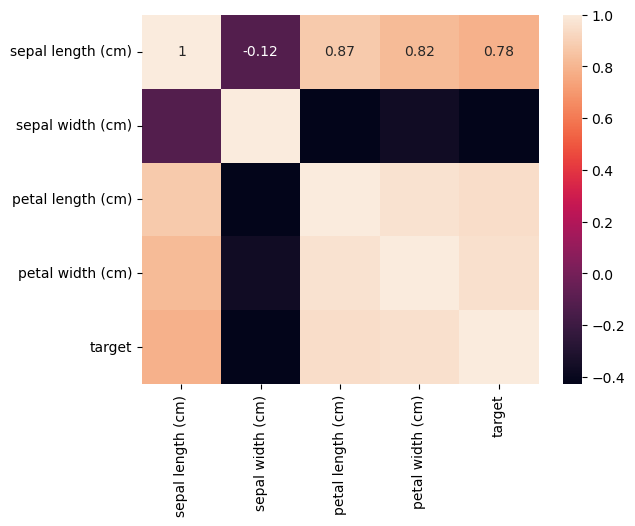

In [35]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(method='pearson'), annot = True)
  
plt.show()

# Insight
Adding to the precedent gtaph : there is a high correaltion between petal sizes and sepal length . 
Sepal width is not correlated to the other features
All the features have good correlations with the target

# Conclusion :

There are good linear correlation between all the features except sepal width. 
Looking at the distributions, Petal sizes can be good candidates to be features in the moidel.
If they are not enough we can add sepal width which is decorrelated.

We can anticipate that with only petal sizes as features, a linear regression model can perform well.
But a clustering model (knn or svm) would be better seeing the graphs. We could insert a PCA to reduce the dimensions to 3 if needed.